# <center>Network Intrusion Detection</center>

#### This Intrusion Detection Evaluation Dataset (CIC-IDS2017) is posted on Kaggle by posted by Chethan H N, and can be found here: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset/data

#### The main purpose of this project is to detect the patterns of normal activity and traffic anomaly without using labels by unsupervised methods. This Network data has two high level classes - Benign and Intrusion. The intrusion class has several types of attacks, which we will try to detect.
#### In this project we will evaluate a few unsupervised models and apply dimensionality reduction techniques.
#### To achieve this, we will follow these steps:

- Collect Data: Gather the dataset for analysis.
- Process Data and Perform Exploratory Data Analysis (EDA): Clean, preprocess, and explore the data to understand its structure and characteristics.
- Apply Dimensionality Reduction Techniques: Reduce the feature space to enhance clustering.
- Evaluate Unsupervised ML Models: Apply various unsupervised learning models to the unlabeled data and select the best-performing model.
- Compare with Supervised ML Models: Apply supervised machine learning models to labeled data to assess and compare their performance.

GitHub repo: https://github.com/INtilakGH/usml_clustering/tree/main

##### 📝 Import required libraries and data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering as AC, KMeans as KM
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import itertools

## <center>1. Collecting Data</center>

##### 📝 This dataset has 8 csv files with network events recorded daily. There are 77 features, and this data also has labels. For this project we will apply Unsupervised ML to identify clusters with suspicious network trafic. We will only use labels for testing purposes and comparing our results with Supervised ML.

In [2]:
data_read_1 = pd.read_csv(r'C:\Users\irent\Downloads\USML\Monday_WorkingHours.pcap_ISCX.csv')
data_read_2 = pd.read_csv(r'C:\Users\irent\Downloads\USML\Tuesday_WorkingHours.pcap_ISCX.csv')
data_read_3 = pd.read_csv(r'C:\Users\irent\Downloads\USML\Wednesday_workingHours.pcap_ISCX.csv')
data_read_4 = pd.read_csv(r'C:\Users\irent\Downloads\USML\Thursday_WorkingHours_Morning_WebAttacks.pcap_ISCX.csv')
data_read_5 = pd.read_csv(r'C:\Users\irent\Downloads\USML\Thursday_WorkingHours_Afternoon_Infilteration.pcap_ISCX.csv')
data_read_6 = pd.read_csv(r'C:\Users\irent\Downloads\USML\Friday_WorkingHours_Morning.pcap_ISCX.csv')
data_read_7 = pd.read_csv(r'C:\Users\irent\Downloads\USML\Friday_WorkingHours_Afternoon_PortScan.pcap_ISCX.csv')
data_read_8 = pd.read_csv(r'C:\Users\irent\Downloads\USML\Friday_WorkingHours_Afternoon_DDos.pcap_ISCX.csv')

In [3]:
df_1 = data_read_1
df_2 = data_read_2
df_3 = data_read_3
df_4 = data_read_4
df_5 = data_read_5
df_6 = data_read_6
df_7 = data_read_7
df_8 = data_read_8

##### 📝 File name added for convenience, to help identify the data source if needed

In [4]:
df_1['File'] = 'Mon-WH'
df_2['File'] = 'Tue-WH'
df_3['File'] = 'Wed-WH'
df_4['File'] = 'Thu-WH-M-WA'
df_5['File'] = 'Thu-WH-A-Inf'
df_6['File'] = 'Fri-WH-M'
df_7['File'] = 'Fri-WH-A-PS'
df_8['File'] = 'Fri-WH-A-DD'

In [5]:
df_1.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
File                            object
Length: 80, dtype: object

##### 📝 All sources combined in one Data Frame

In [6]:
dataframes = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8]

In [7]:
unioned_df_all = pd.concat(dataframes, ignore_index=True)
unioned_df_all.shape

(2830743, 80)

##### 📝 This data is too big, nearly 3M rows, so we will only use a subset - three files out of eight (Only Monday, Tuesday & Wednesday)

In [8]:
dataframes_2 = [df_1,df_2, df_3]

In [9]:
unioned_df = pd.concat(dataframes_2, ignore_index=True)

## <center>2. EDA</center>

In [10]:
unioned_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,File
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Mon-WH
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Mon-WH
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Mon-WH
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Mon-WH
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Mon-WH


In [11]:
unioned_df.shape

(1668530, 80)

In [12]:
unioned_df.replace([np.inf, -np.inf], np.nan, inplace=True)
unioned_df.fillna(0, inplace=True)

In [13]:
unioned_df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
File                           0
Length: 80, dtype: int64

In [14]:
unioned_df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [15]:
unioned_df[' Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed'],
      dtype=object)

##### 📝 After conducting research online, I gathered the following information to better understand the types of network intrusions.

- **BENIGN:** Normal or harmless network activity. This traffic does not represent a threat.
- **FTP-Patator:** A brute-force attack on the FTP (File Transfer Protocol) service using a tool like "Patator" to guess login credentials.
- **SSH-Patator:** Similar to FTP-Patator, but targeting SSH (Secure Shell) instead of FTP, attempting to gain unauthorized access by guessing passwords.
- **DoS slowloris:** A Denial of Service (DoS) attack using the Slowloris technique, which holds many connections to the target server open to exhaust its resources.
- **DoS Slowhttptest:** A DoS attack using the Slowhttptest tool, which targets HTTP servers by sending incomplete HTTP requests to consume server resources.
- **DoS Hulk:** A high-traffic HTTP flood DoS attack, using the Hulk tool to overwhelm the target web server with massive numbers of HTTP requests.
- **DoS GoldenEye:** Another DoS attack, similar to Hulk, designed to overwhelm servers by generating excessive traffic.
- **Heartbleed:** A vulnerability in OpenSSL that allows attackers to read sensitive data (like passwords or encryption keys) from the memory of servers.
- **Web Attack – Brute Force:** A brute-force attack targeting web applications, typically trying many password combinations to gain unauthorized access.
- **Web Attack – XSS (Cross-Site Scripting):** A type of web attack where malicious scripts are injected into otherwise trusted websites to steal data, deface content, or perform unauthorized actions on behalf of users.
- **Web Attack – SQL Injection:** An attack technique where malicious SQL code is injected into a database query via a vulnerable application, allowing attackers to manipulate or access database content.
- **Infiltration:** Unauthorized access into an internal network, potentially by bypassing firewalls or other security mechanisms.
- **Bot:** Malicious software acting as part of a botnet, controlled by an attacker to carry out tasks such as spamming, data theft, or launching attacks.
- **PortScan:** A reconnaissance activity where an attacker scans a network for open ports to identify potential entry points for exploitation.
- **DDoS (Distributed Denial of Service):** A more advanced and larger-scale DoS attack where multiple devices (often part of a botnet) flood the target with traffic, rendering it inaccessible.

In [16]:
# Dropping redundant columns and label
df_only_features = unioned_df.drop(columns=[' Destination Port', ' Label', 'File'])

In [17]:
correlation_matrix = df_only_features.corr()

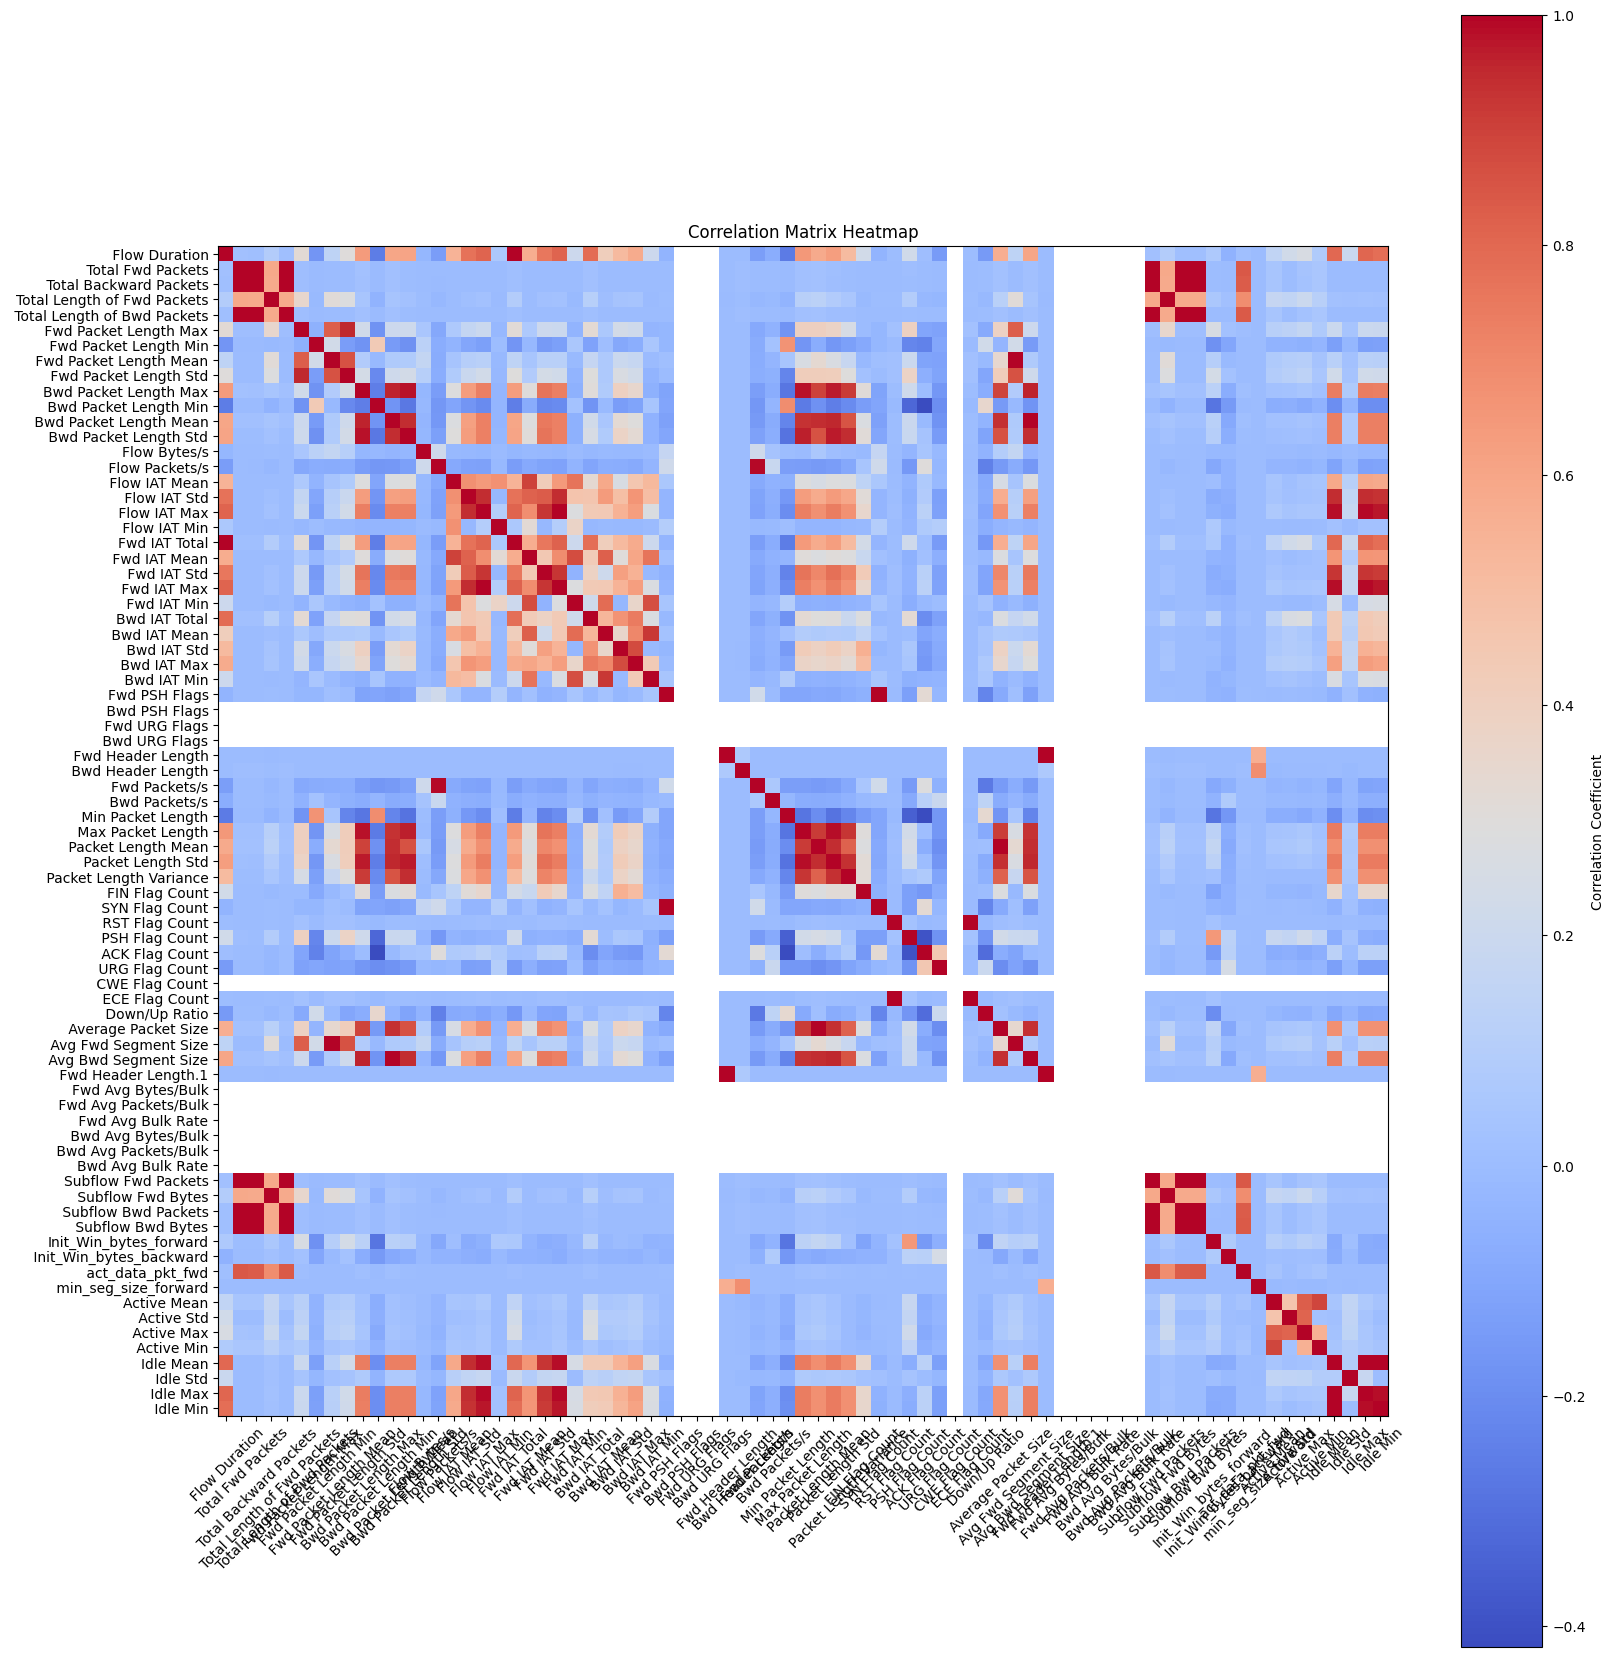

In [18]:
plt.figure(figsize=(17, 17))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [19]:
max_val = df_only_features.max()
min_val = df_only_features.min()

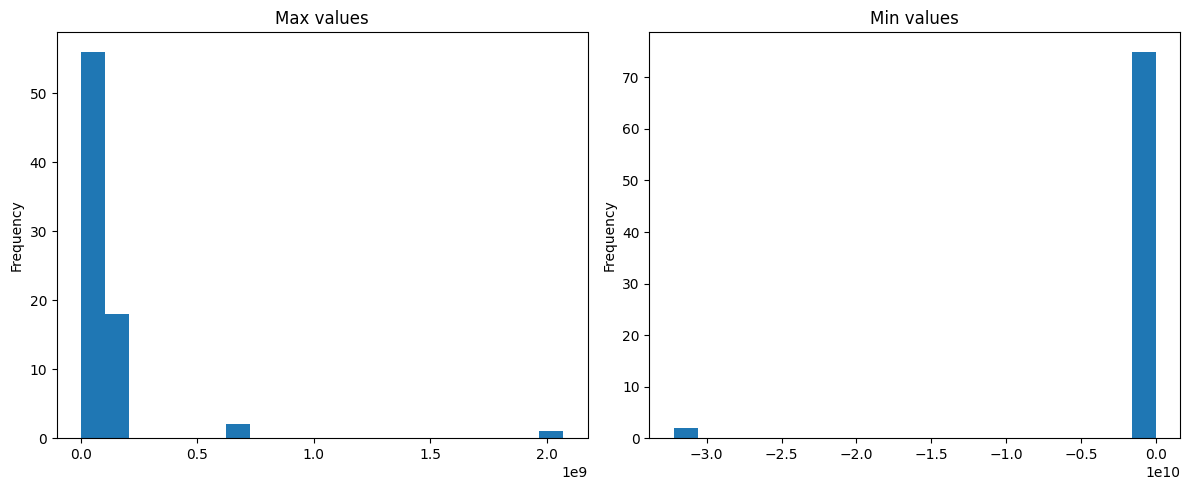

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
max_val.plot(kind='hist', bins=20)
plt.title('Max values')

plt.subplot(1, 2, 2)
min_val.plot(kind='hist', bins=20)
plt.title('Min values')

plt.tight_layout()
plt.show()

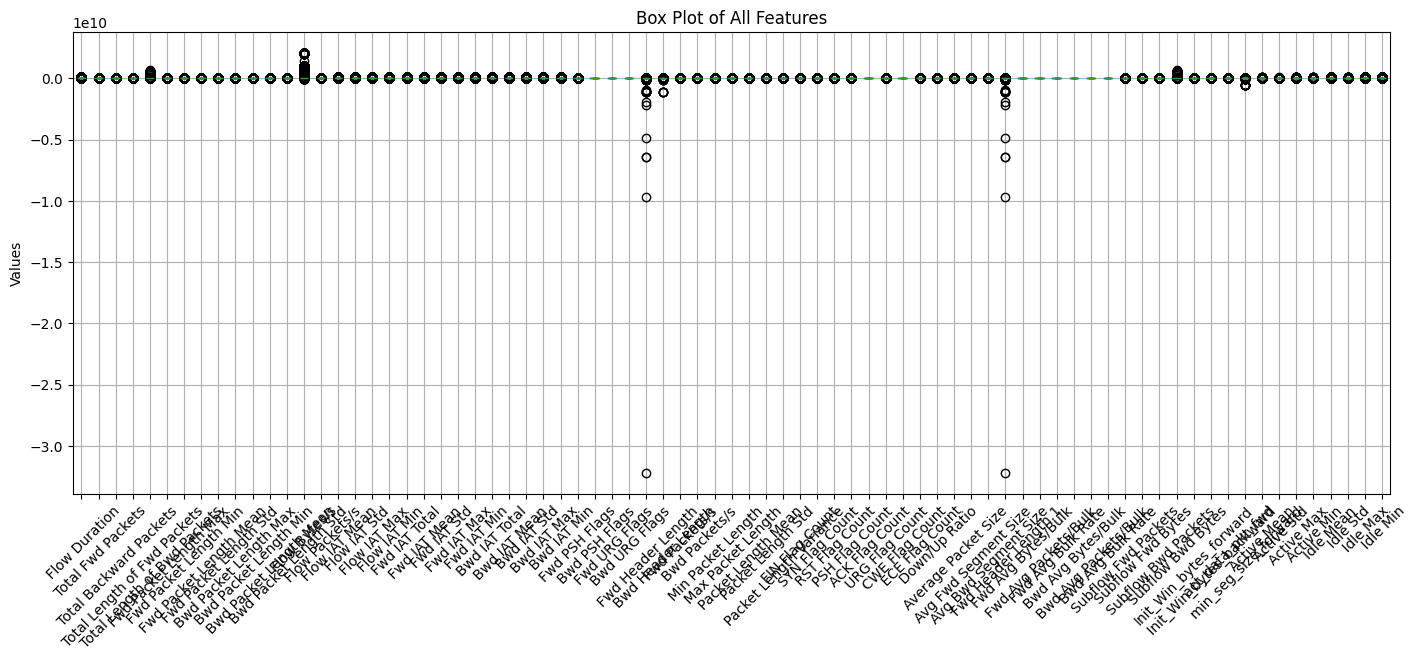

In [21]:
df_only_features.boxplot(figsize=(17, 6))

plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)

plt.show()

##### 📝 This dataset contains negative values, making Non-Negative Matrix Factorization (NMF) unsuitable. Therefore, we will use Singular Value Decomposition (SVD) for dimensionality reduction in our clustering analysis.

In [22]:
neg_values = (df_only_features < 0).any()
df_only_features.loc[:, neg_values]

,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Header Length.1,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
0,4,3.000000e+06,5.000000e+05,4.0,4,4,4,40,0,40,329,-1,20
1,1,1.200000e+07,2.000000e+06,1.0,1,1,1,40,0,40,329,-1,20
2,1,1.200000e+07,2.000000e+06,1.0,1,1,1,40,0,40,329,-1,20
3,1,1.200000e+07,2.000000e+06,1.0,1,1,1,40,0,40,329,-1,20
4,3,4.000000e+06,6.666667e+05,3.0,3,3,3,40,0,40,245,-1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668525,32215,8.194940e+03,1.862486e+02,6443.0,30780,3,4,80,64,80,-1,-1,20
1668526,324,1.376543e+06,1.234568e+04,108.0,320,2,2,40,40,40,-1,-1,20
1668527,82,4.512195e+05,3.658537e+04,41.0,78,4,4,64,20,64,1006,0,32
1668528,1048635,4.272221e+02,7.628965e+00,149805.0,1000947,1,1,120,40,120,-1,-1,20


## <center>3. Analysis Using Unsupervised Learning Models</center>

##### 📝 Using a subset of 30000 records to avoid memory errors.

In [23]:
sample_data_with_label = unioned_df.sample(n=30000, random_state=100)

In [24]:
label = sample_data_with_label.loc[:, [' Label']]

In [25]:
label[' Label'].unique()

array(['BENIGN', 'DoS Hulk', 'DoS slowloris', 'DoS Slowhttptest',
       'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator'], dtype=object)

In [26]:
mapping = {'BENIGN': 0, 'FTP-Patator': 1, 'SSH-Patator': 1, 'DoS slowloris':2, 'DoS Slowhttptest':2, 'DoS Hulk':2, 'DoS GoldenEye':2}
label[' Label'] = label[' Label'].replace(mapping)
label[' Label'].unique()

array([0, 2, 1], dtype=int64)

##### 📝 In clustering, the labels get assigned randomly, so the label numbering won't match the ground truth necessarily, so we need to find best matching label ordering based on the accuracy. The function below will be used for that.

In [27]:
def label_permute_compare(ytdf,yp,n):

    acc = 0
    labelorder = None
    
    for i in itertools.permutations(range(n)):
        yp_1 = np.array([i[label] for label in yp])
        
        accuracy = accuracy_score(ytdf, yp_1)
        
        if accuracy > acc:
            acc = accuracy 
            labelorder = i
            
    return labelorder, acc

##### 📝 Now we need to drop the label and redundant columns

In [28]:
sample_data = sample_data_with_label.drop(columns=[' Destination Port', ' Label', 'File'])

### <center>3.1. Agglomerative Clustering</center>

##### 📝 Our dataset has 77 features, which creates significant challenges for clustering algorithms, as the increased dimensionality causes data points to become sparse and distant, making meaningful cluster identification increasingly difficult. We will use Singular Value Decomposition (SVD) technique to solve that. Then we will need to find the number of clusters for our model, we can so by creating a dendrogram.

#### Step 1 - Find number of components for Matrix Factorization

In [29]:
A = sample_data.to_numpy()

In [30]:
svd = TruncatedSVD(n_components=min(A.shape[1], A.shape[0]))
svd.fit(A)

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(svd.explained_variance_ratio_)

# Number of components that explain desired variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
n_components

4

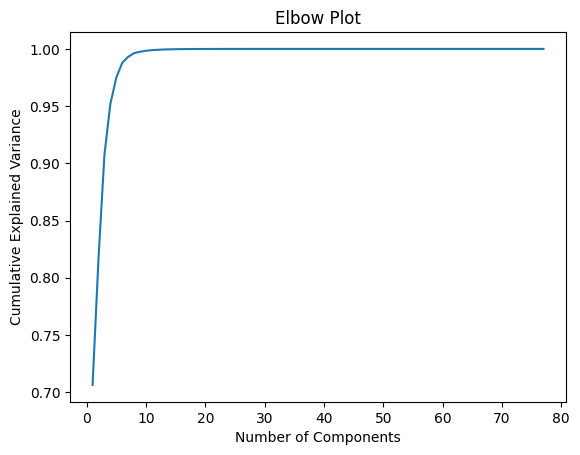

In [31]:
svd = TruncatedSVD(n_components=min(A.shape[1], A.shape[0]))
svd.fit(A)

plt.plot(range(1, len(svd.explained_variance_ratio_) + 1), 
         np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot')
plt.show()

#### Step 2 - Apply Singular Value Decomposition (SVD)

In [32]:
n_components = 5

svd = TruncatedSVD(n_components=n_components)
A_reduced = svd.fit_transform(A)
A_approx = svd.inverse_transform(A_reduced)

print("\nReduced Representation (Latent Factors):")
print(A_reduced)


Reduced Representation (Latent Factors):
[[ 4.48812704e+02 -3.77775871e+01  5.22954583e+05 -1.46342330e+02
   1.07631066e+02]
 [ 7.70931816e+04 -5.85955234e+02  3.31536181e+03 -2.28425654e+04
   2.57933272e+04]
 [ 4.86983690e+04  1.34338549e+03  2.54553883e+03 -1.54358460e+04
   2.49850999e+04]
 ...
 [ 2.13828616e+08 -6.77377984e+07  2.25385567e+03 -3.95639317e+07
   7.97188192e+06]
 [ 4.88710433e+01  1.30983712e+00  1.13128015e+02 -1.59059861e+01
   2.61643271e+01]
 [ 6.00561343e+01  2.13373423e+00  9.22927100e+01 -1.98675294e+01
   3.21586496e+01]]


##### 📝 Assuming our data has no labels, we would need to know the number of clusters. To begin, we will build a dendrogram using hierarchical clustering. By inspecting the graph we can decide on the number of clusters.

#### Step 3 - Create a dendrogram

In [37]:
numerical_data = sample_data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

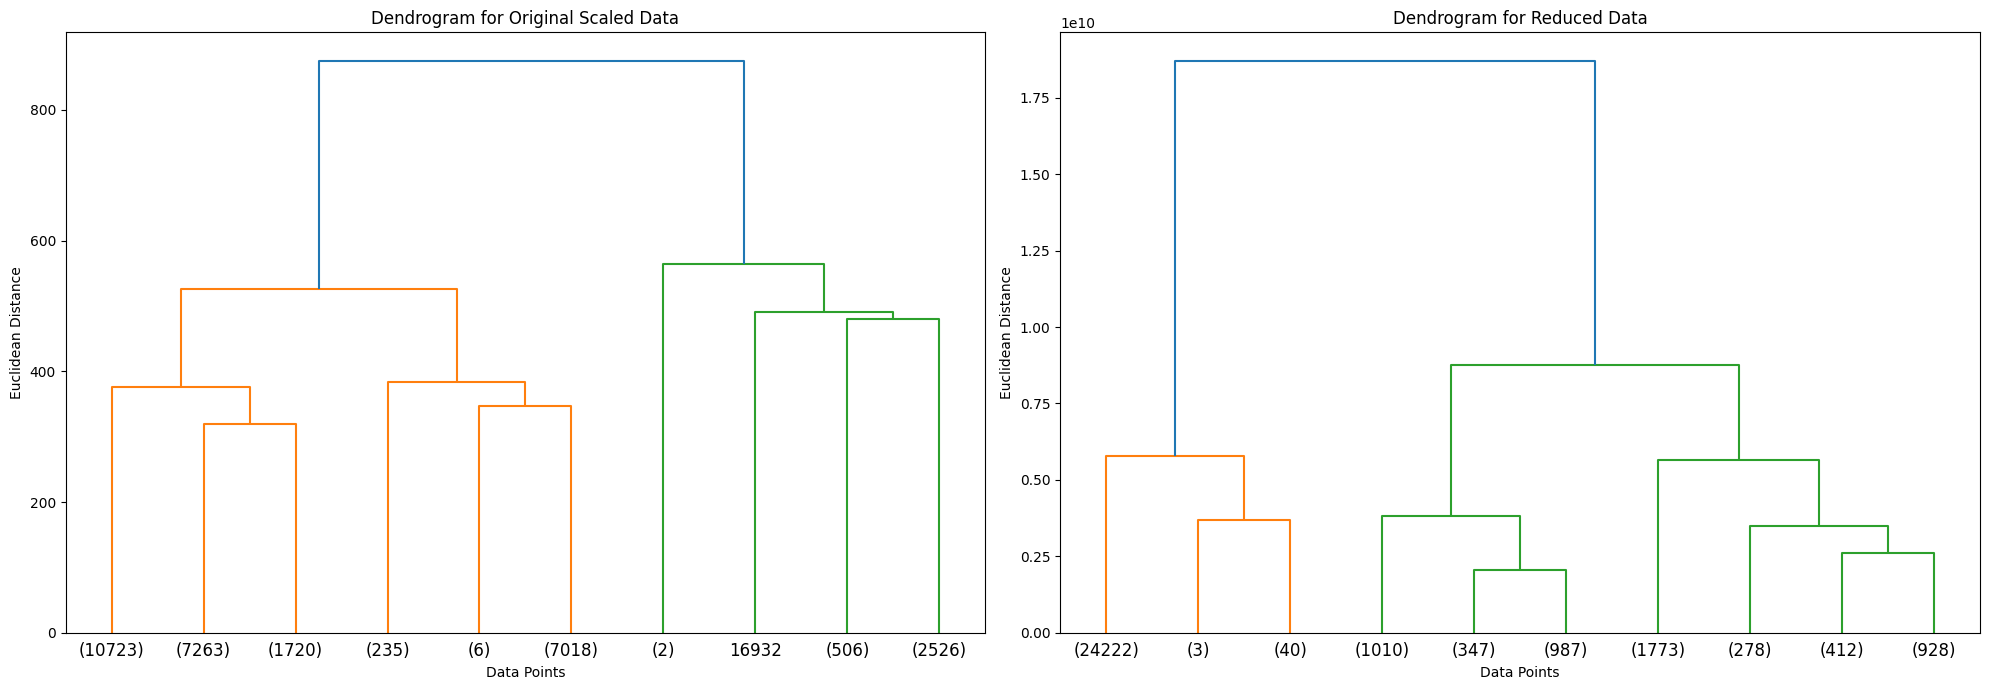

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# First dendrogram (original scaled data)
linked1 = linkage(scaled_data, method='ward')
dendrogram(linked1, truncate_mode='lastp', p=10, show_leaf_counts=True, ax=ax1)
ax1.set_title("Dendrogram for Original Scaled Data")
ax1.set_xlabel("Data Points")
ax1.set_ylabel("Euclidean Distance")

# Second dendrogram (reduced data)
linked2 = linkage(A_reduced, method='ward')
dendrogram(linked2, truncate_mode='lastp', p=10, show_leaf_counts=True, ax=ax2)
ax2.set_title("Dendrogram for Reduced Data")
ax2.set_xlabel("Data Points")
ax2.set_ylabel("Euclidean Distance")

plt.tight_layout()
plt.show()

##### 📝 We will analyze the reduced data graph, as the clusters are more distinguishable in this representation. By setting a dissimilarity threshold, we can determine the number of clusters. Two clusters exhibit the largest separation from the rest, which might correspond to two classes: normal network activity and intrusion. However, for our analysis, we are focusing on a more detailed granularity, making three clusters a more suitable choice.

##### Additionally, we will evaluate the performance of machine learning on both datasets: the full feature set and the reduced feature set. To compare results, we will utilize two unsupervised models and subsequently assess the performance of a supervised model as well.

#### Step 4 - Hierarchical clustering on full feature set, compare ward vs complete linkage

In [39]:
n = 3

In [40]:
model_agg_ward = AC(n_clusters=n, metric='euclidean', linkage='ward')
start_time_AC_all = time.time()
model_agg_ward.fit(scaled_data)
AC_time_all = time.time() - start_time_AC_all

labels_pred_agg_ward = model_agg_ward.labels_

In [41]:
model_agg_comp = AC(n_clusters=n, metric='euclidean', linkage='complete')
start_time_AC_all = time.time()
model_agg_comp.fit(scaled_data)
AC_time_all = time.time() - start_time_AC_all

labels_pred_agg_comp = model_agg_comp.labels_

In [42]:
labelorder_ward, acc_ward = label_permute_compare(label, labels_pred_agg_ward, n)
print(labelorder_ward, acc_ward)

(0, 2, 1) 0.9098666666666667


In [43]:
labelorder_comp, acc_comp = label_permute_compare(label, labels_pred_agg_comp, n)
print(labelorder_comp, acc_comp)

(0, 1, 2) 0.8382


In [44]:
cm_agg_ward = confusion_matrix(label, labels_pred_agg_ward)
cm_agg_comp = confusion_matrix(label, labels_pred_agg_comp)

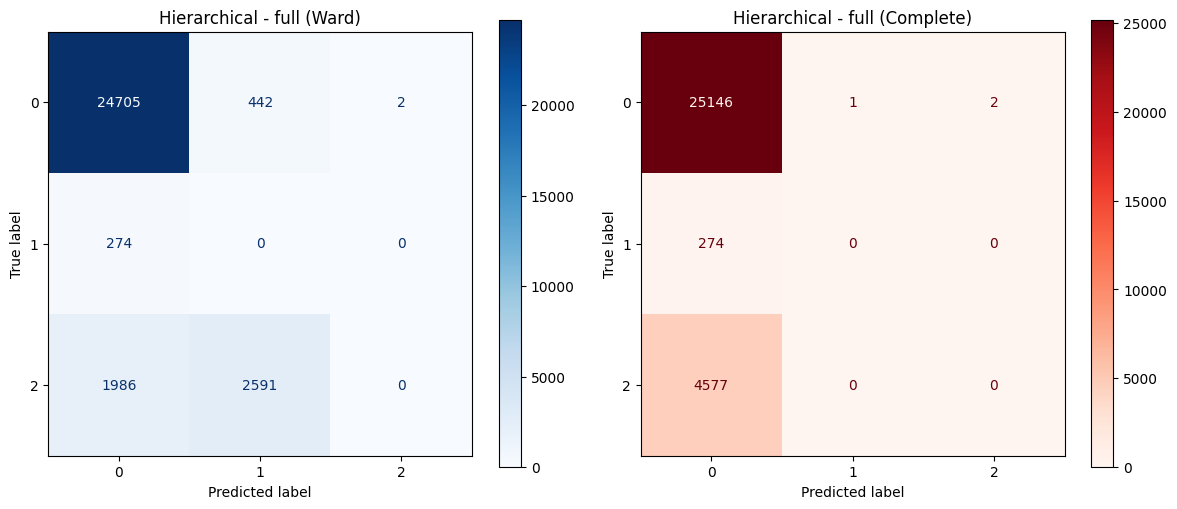

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First plot
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_agg_ward)
disp1.plot(cmap=plt.cm.Blues, ax=ax1)
ax1.set_title("Hierarchical - full (Ward)")

# Second plot
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_agg_comp)
disp2.plot(cmap=plt.cm.Reds, ax=ax2)
ax2.set_title("Hierarchical - full (Complete)")

plt.tight_layout()
plt.show()

#### Step 5 - Hierarchical clustering on reduced feature set - ward linkage

In [46]:
model_agg_reduced = AC(n_clusters=n, metric='euclidean', linkage='ward')
start_time_AC_red = time.time()
model_agg_reduced.fit(A_reduced)
AC_time_reduced = time.time() - start_time_AC_red

labels_pred_agg_reduced = model_agg_reduced.labels_

In [47]:
labelorder_ac_r_w, acc_ac_r_w = label_permute_compare(label, labels_pred_agg_reduced, n)
print(labelorder_ac_r_w, acc_ac_r_w)

(0, 2, 1) 0.8246


In [48]:
cm_agg_reduced = confusion_matrix(label, labels_pred_agg_reduced)

### <center>3.2. K-Means Clustering</center>

In [49]:
model_km_reduced = KM(n_clusters=n, random_state=100, n_init='auto')

start_time = time.time()
model_km_reduced.fit(A_reduced)
KM_time_reduced = time.time() - start_time
labels_pred_km_reduced = model_km_reduced.labels_

In [50]:
labelorder_km, acc_km = label_permute_compare(label, labels_pred_km_reduced, n)
print(labelorder_km, acc_km)

(0, 2, 1) 0.8233666666666667


In [51]:
cm_km_reduced = confusion_matrix(label, labels_pred_km_reduced)

### <center>3.3. Compare Results</center>

In [52]:
print(f"Hierarchical (ward) Reduced Set Accuarcy: {acc_ac_r_w:.4f} ")
print(f"K-Means Reduced Set Accuarcy: {acc_km:.4f} ")

Hierarchical (ward) Reduced Set Accuarcy: 0.8246 
K-Means Reduced Set Accuarcy: 0.8234 


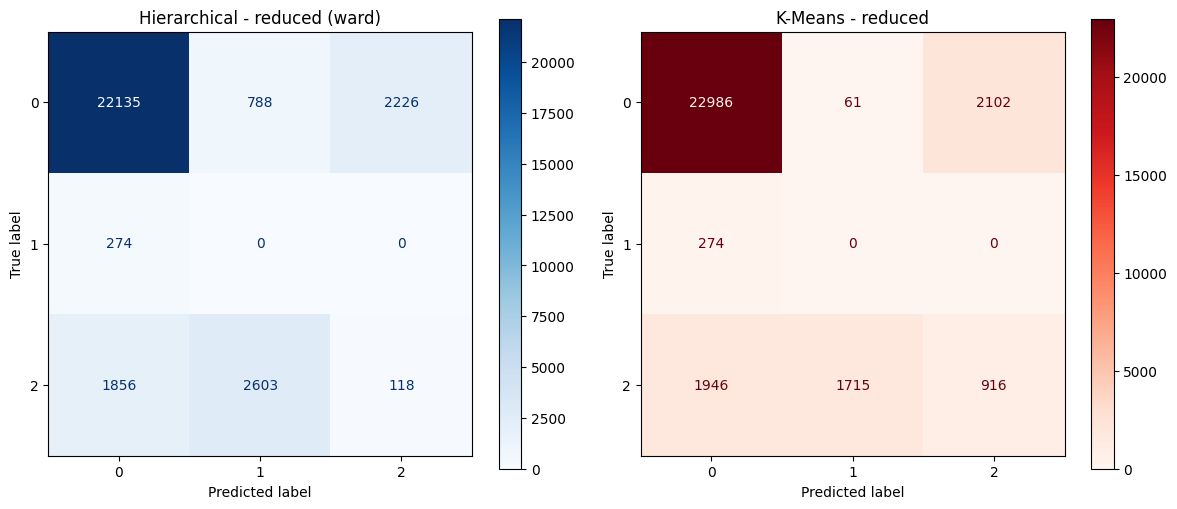

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_agg_reduced)
disp1.plot(cmap=plt.cm.Blues, ax=ax1)
ax1.set_title("Hierarchical - reduced (ward)")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_km_reduced)
disp2.plot(cmap=plt.cm.Reds, ax=ax2)
ax2.set_title("K-Means - reduced")

plt.tight_layout()
plt.show()

## <center>4. Supervised ML - Random Forest</center>

In [54]:
X = sample_data
y = label[' Label'].values.reshape(-1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

rf_model = RandomForestClassifier(n_estimators=100, random_state=100)
start_time_RF = time.time()
rf_model.fit(X_train, y_train)
RF_time = time.time() - start_time_RF

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [56]:
accuracy

0.9973333333333333

In [57]:
conf_matrix

array([[4981,    1,    5],
       [   4,   60,    0],
       [   6,    0,  943]], dtype=int64)

## <center>5. Training Time by Models</center>

In [58]:
print(f"Hierarchical Time All Features: {AC_time_all:.4f} seconds")
print(f"Hierarchical Time Reduced: {AC_time_reduced:.4f} seconds")
print(f"K-Means Time Reduced: {KM_time_reduced:.4f} seconds")
print(f"Random Forest Time: {RF_time:.4f} seconds")

Hierarchical Time All Features: 42.3798 seconds
Hierarchical Time Reduced: 27.0319 seconds
K-Means Time Reduced: 0.4390 seconds
Random Forest Time: 6.0782 seconds


## <center>6. Conclusion</center>

After evaluating several machine learning models, we identified two models that performed best for the clustering problem on the given dataset: Hierarchical Clustering (Ward linkage) on the reduced feature set and K-Means Clustering on the reduced feature set. The dendrogram analysis distinguished three clusters, which were used for training. Below are the key results:

Clustering Results:
- Hierarchical Clustering (Ward) Accuracy on Reduced Set: 0.8246
- K-Means Accuracy on Reduced Set: 0.8234 <br>

Training Times:
- Hierarchical Clustering on Full Feature Set: 40.2842 seconds
- Hierarchical Clustering on Reduced Feature Set: 27.3645 seconds
- K-Means Clustering on Reduced Feature Set: 0.0457 seconds
- Random Forest Classification: 5.5657 seconds

For the classification problem, using the full feature set yielded the highest accuracy of 0.9973. However, this result relies on the availability of known labels, making it suitable only for supervised scenarios.

In summary, while hierarchical clustering and K-Means both performed well for unsupervised clustering, K-Means demonstrated significantly faster training times. For classification, Random Forest achieved exceptional accuracy but is limited to labeled data.